In [1]:
import pandas as pd
enformer_preds = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/dsqtls/process/enformer_preds_all.csv"

In [2]:
scores = pd.read_csv(enformer_preds,header=None)
scores[0] = scores[0].str.replace("b'","").str.replace("'","")
enformer_preds = scores

In [3]:
dnase_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_SE/GM12878/nautilus_runs/GM12878_03.06.2022_bias_128_4_1234_0.8_fold_0/dsqtl_preds/snp_scores.tsv"
dsqtls_dnase = pd.read_csv(dnase_preds,sep="\t", header=0, index_col=False)
dsqtls_dnase[['gkm_SVM','kmer_SVM','abs_gkm_SVM','abs_kmer_SVM','CADD','GWAVA_region','GWAVA_tss','GWAVA_unmatched','GERP','label']] = dsqtls_dnase['META_DATA'].str.split(",", expand=True)


In [4]:
atac_preds="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/dsqtl_preds/snp_scores.tsv"
dsqtls_atac = pd.read_csv(atac_preds,sep="\t", header=0, index_col=False)
dsqtls_atac[['gkm_SVM','kmer_SVM','abs_gkm_SVM','abs_kmer_SVM','CADD','GWAVA_region','GWAVA_tss','GWAVA_unmatched','GERP','label']] = dsqtls_dnase['META_DATA'].str.split(",", expand=True)


In [5]:
dsqtls_dnase["rsid"] = dsqtls_dnase["CHR"] + "_" + dsqtls_dnase["POS0"].astype(str) + "_" + dsqtls_dnase["REF"] + "_" + dsqtls_dnase["ALT"]

In [6]:
dsqtls_dnase["rsid"]

0           chr1_846445_A_G
1           chr1_901457_G_A
2          chr1_1176364_T_A
3          chr1_1217274_A_G
4          chr1_1580437_A_G
                ...        
28303    chr9_140155406_T_C
28304    chr9_140181120_T_C
28305    chr9_140213800_A_G
28306    chr9_140219483_G_C
28307    chr9_140229799_A_T
Name: rsid, Length: 28308, dtype: object

In [7]:
snps=pd.read_csv("/mnt/lab_data3/anusri/histone_expts/all_qtl_analysis/gm12878_sequence_sets/test_set/deltasv,/41588_2015_BFng3331_MOESM26_ESM.csv",header=0,sep=',')
df = pd.DataFrame()
df['label'] = snps["label"].astype(int)
df['abs_gkm_SVM'] = snps["abs_gkm_SVM"].astype(str)
df['rsid'] = snps["SNPname2"].astype(str)
df["Chr"] = snps["chrom_hg18"].astype(str) 
df["Pos0"] = snps["pos_hg18"].astype(int) - 1
df['POSTallele']= snps["allele1"].astype(str)
df['ALTallele']= snps["allele2"].astype(str)
df['rsid2'] = df["Chr"] + "_" + df["Pos0"].astype(str) + "_" + df["POSTallele"] + "_" + df["ALTallele"] 
df['META']=snps[['gkm_SVM','kmer_SVM','abs_gkm_SVM','abs_kmer_SVM','CADD','GWAVA_region','GWAVA_tss','GWAVA_unmatched','GERP','label']].astype(str).agg(','.join, axis=1)


In [8]:
merged = df.merge(enformer_preds,left_on="rsid",right_on=0, how="inner")

In [9]:
merged.shape

(27390, 12)

In [12]:
merged

,label,abs_gkm_SVM,rsid,Chr,Pos0,POSTallele,ALTallele,rsid2,META,0,1,2
0,1,2.653531,rs141671872,chr1,846445,A,G,chr1_846445_A_G,"2.653531,7.938784,2.653531,7.938784,-1.522533,...",rs141671872,0.000342,0.0004501
1,1,2.821422,rs7417106,chr1,901457,G,A,chr1_901457_G_A,"2.821422,6.027648,2.821422,6.027648,1.739152,0...",rs7417106,0.001241,0.001526
2,1,7.167236,rs6603785,chr1,1176364,T,A,chr1_1176364_T_A,"-7.167236,-10.870018,7.167236,10.870018,-0.091...",rs6603785,-0.00653,-0.00784
3,1,3.957382,rs112571439,chr1,1217274,A,G,chr1_1217274_A_G,"-3.957382,2.387491,3.957382,2.387491,1.127472,...",rs112571439,-0.001878,-0.00229
4,1,4.785596,rs9661285,chr1,1580437,A,G,chr1_1580437_A_G,"-4.785596,-6.827102,4.785596,6.827102,0.665464...",rs9661285,0.008736,0.01023
...,...,...,...,...,...,...,...,...,...,...,...,...
27385,-1,0.487228,rs3750506,chr9,140058003,A,G,chr9_140058003_A_G,"0.487228,1.529274,0.487228,1.529274,-0.580919,...",rs3750506,-4.5e-06,-6.26e-06
27386,-1,2.804388,rs10780199,chr9,140073117,G,A,chr9_140073117_G_A,"2.804388,5.312007,2.804388,5.312007,0.245404,0...",rs10780199,3.34e-06,4.6e-06
27387,-1,0.444036,rs7852209,chr9,140155406,T,C,chr9_140155406_T_C,"0.444036,-1.583811,0.444036,1.583811,-0.606667...",rs7852209,1.13e-06,1.5e-06
27388,-1,1.363332,rs4066694,chr9,140181120,T,C,chr9_140181120_T_C,"1.363332,1.703144,1.363332,1.703144,0.489617,0...",rs4066694,4.9e-06,6.85e-06


In [15]:
merged[2] = merged[2].astype(float)
merged[1] = merged[1].astype(float)

Text(0, 0.5, 'Precision')

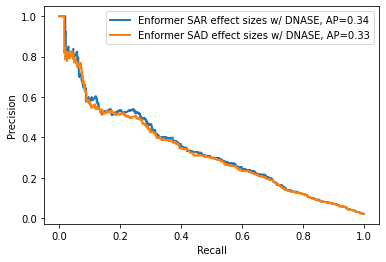

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged["label"], abs(merged[2]))
roc_auc = metrics.average_precision_score(merged["label"], abs(merged[2]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Enformer SAR effect sizes w/ DNASE, AP="+str(round(roc_auc,2)))


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(merged["label"], abs(merged[1]))
roc_auc = metrics.average_precision_score(merged["label"], abs(merged[1]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label="Enformer SAD effect sizes w/ DNASE, AP="+str(round(roc_auc,2)))

plt.legend(loc='upper right')
plt.xlabel("Recall")
plt.ylabel("Precision")
